In [13]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [41]:
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

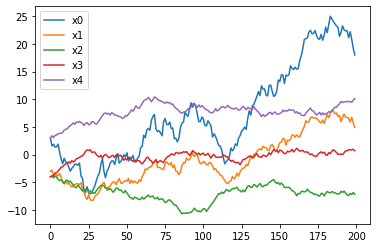

,x0,x1,x2,x3,x4
x0,1.000000,0.993202,-0.056126,0.460917,0.368422
x1,0.993202,1.000000,-0.053251,0.458618,0.360972
x2,-0.056126,-0.053251,1.000000,-0.324967,-0.544805
x3,0.460917,0.458618,-0.324967,1.000000,0.388697
x4,0.368422,0.360972,-0.544805,0.388697,1.000000


In [42]:
np.random.seed(1337)

STREAM_LENGTH = 200
N = 5
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

df.corr()

8.472639836622173 6.956690964841889


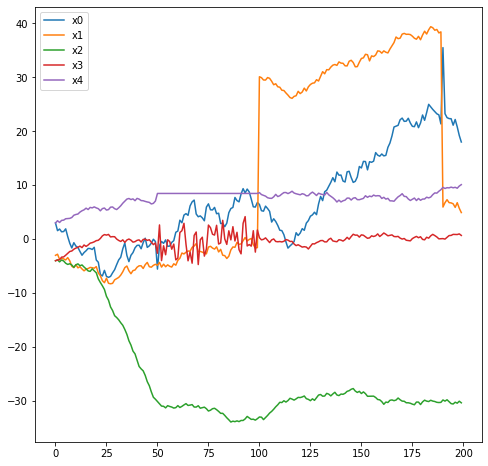

,x0,x1,x2,x3,x4
0,3.000000,-3.000000,-4.000000,-4.000000,3.000000
1,1.572558,-2.796408,-3.837190,-3.867646,3.416495
2,1.873181,-3.736824,-4.210519,-3.813804,3.090938
3,1.361140,-3.546805,-3.861269,-3.331156,3.480557
4,1.408475,-3.665022,-4.050450,-3.296588,3.525002
...,...,...,...,...,...
195,21.123842,6.553748,-30.564472,0.883275,9.523623
196,22.186630,5.888479,-30.231556,0.876228,9.611910
197,20.816212,6.757978,-30.413616,0.856251,9.440086
198,19.224018,5.723776,-30.046544,0.972684,9.843976


In [56]:

df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)]}],
                      'shift':   [{'n': 1, 'timestamps': [(100,190)]}],
                      'trend':   [{'n': 2, 'timestamps': [(20, 50)]}],
                      'variance':[{'n': 3, 'timestamps': [(50, 100)]}],
                      'flatline':[{'n': 4, 'timestamps': [(50, 100)]}]})

#ellipse = patches.Ellipse((75, df['x4'][50]), width=60, height=3, edgecolor='brown', facecolor='none', linewidth=4)

plt.figure(figsize=(8,8))
for col in df.columns:
    plt.plot(df[col], label=col)
    
ax = plt.gca()
#ax.add_patch(ellipse)
plt.legend()
plt.show()
df